In [1]:
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import seaborn as sns
import hvplot.pandas
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import os

c:\Users\darvarir\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

# URL for the 'USGS_NPWGDv3_excel.xlsx' file 
file_url = 'https://www.sciencebase.gov/catalog/file/get/64fa1e71d34ed30c2054ea11?f=__disk__e7%2Fef%2F17%2Fe7ef17fcb71c49e2241da4139ed775f8e328bdab'

# Download the file
response = requests.get(file_url)
with open('../../data/source/USGS_NPWGDv3_excel.xlsx', 'wb') as file:
    file.write(response.content)

print('Download complete.')

Download complete.


### Read Excel File

In [5]:
df = pd.read_excel('../../data/source/USGS_NPWGDv3_excel.xlsx')
df.head()

,IDUSGS,IDORIG,PLAYTYPE,WELLTYPE,BASIN,FORMSIMPLE,TDS,LATITUDE,LONGITUDE,FIPCODE,...,I129,Rn222,Ra226,Ra228,MICROBES,CHARGEBAL,REMARKS,IDDB,SOURCE,REFERENCE
0,1,WE-B3,Shale,Shale Gas,Appalachian,Marcellus,96570.0,40.2354,-79.4704,42129.0,...,NaN,NaN,NaN,NaN,NaN,100.0,Sr from Chapman et al. (2012),PHANMARCELLUS,NaN,"(Phan and others, 2016)"
1,2,WE-B5,Shale,Shale Gas,Appalachian,Marcellus,96570.0,40.2354,-79.4704,42129.0,...,NaN,NaN,NaN,NaN,NaN,100.0,Sr from Chapman et al. (2012),PHANMARCELLUS,NaN,"(Phan and others, 2016)"
2,3,WE-B7,Shale,Shale Gas,Appalachian,Marcellus,96570.0,40.2354,-79.4704,42129.0,...,NaN,NaN,NaN,NaN,NaN,100.0,Sr from Chapman et al. (2012),PHANMARCELLUS,NaN,"(Phan and others, 2016)"
3,4,WE-B9,Shale,Shale Gas,Appalachian,Marcellus,96570.0,40.2354,-79.4704,42129.0,...,NaN,NaN,NaN,NaN,NaN,100.0,Sr from Chapman et al. (2012),PHANMARCELLUS,NaN,"(Phan and others, 2016)"
4,5,WE-B13,Shale,Shale Gas,Appalachian,Marcellus,96570.0,40.2354,-79.4704,42129.0,...,NaN,NaN,NaN,NaN,NaN,100.0,Sr from Chapman et al. (2012),PHANMARCELLUS,NaN,"(Phan and others, 2016)"


## General Cleaning

### Adjust Columns

In [6]:
# List of columns to be removed
columns_to_remove = [
    "IDORIG","FIPCODE","COORDAPX","COORDNEW","STATEFIP","COUNTYFIP","COUNTYORIG","FIELD","FIELDCODE","TOWNRANGE",
    "LOC","OPERATOR","WELLCODE","PERMIT","DATECOMP","ELEVATION","NWIS","GROUP","MEMBER","ERA",
    "EPOCH","LITHOLOGY","POROSITY","TIMESERIES","DAY","DATEANALYS","METHOD","LAB","TEMP_R","PRESSURE","SG",
    "SPGRAV","SPGRAVT","RESIS","RESIST","PHT","EHORP","COND","CONDT","TEMP","TURBIDITY","HEM","MBAS","UNITSORIG",
    "TDSLAB","TDSCALC","TDSDESC","TSS","Ag", "Al", "As", "Au","BO3", "Be", "Bi","Cd", "Co","CO3", "Cr", "Cs", "Cu", "F", 
    "FeIII","FeII","FeS","FeAl","FeAl2O3","Ga","Ge","Hf","Hg","I","Mn","Mo", "N", "NO2", "NO3", "NO3NO2", "NH4", 
    "TKN", "Ni", "OH", "P", "PO4", "Pb", "Rh", "Rb", "S", "SO3", "HS", "Sb","Sc","Se","Si","Sn","Th","Ti","Tl","U","V","W",
    "Y","Zr","La","Ce","Pr","Nd","Sm","Eu","Gd","Tb","Dy","Ho","Er","Tm","Yb","Lu","ACIDITY","ALKALINITY","DIC","DOC","TOC","CYANIDE","BOD",
    "COD","BENZENE","ETHYLBENZ","NAPHTH","PERC","TOLUENE","XYLENE","PHENOLS","ACETATE","BUTYRATE","FORMATE","LACTATE",
    "PROPIONATE","PYRUVATE","VALERATE","ORGACIDS","Ar","CH4","C2H6","CO2","H2","H2S","He","N2","NH3","O2","ALPHA","BETA",
    "dD","H3","d7Li","d11B","d13C","C14","d18O","d34S","d37Cl","K40","d81Br","Sr87Sr86","I129","Rn222","Ra226","Ra228",
    "MICROBES","REMARKS","IDDB","SOURCE","REFERENCE"]

# Remove the specified columns
df_limited_column = df.drop(columns=columns_to_remove, errors='ignore')

# Display the updated merged dataframe
df_limited_column.to_csv('../../data/df_output/df_limited_column.csv', index=False)

### Remove Coal, Injection, and Geothermal Play type
### Remove Injection Well Type

In [7]:
df_limited_column=df_limited_column[~df_limited_column['PLAYTYPE'].isin(['Coal', 'Injection','Geothermal'])]
df_limited_column=df_limited_column[~df_limited_column['WELLTYPE'].isin(['Injection'])]

# Display the updated merged dataframe
df_limited_column.to_csv('../../data/df_output/df_limited_column_playtype_welltype.csv',index=False)

### Categorize Basins

In [8]:
# Add column "BASIN_CATEGORY" to df_filtered to aid in later filtering

# Define the basin categories
basin_categories = {
    'Anadarko': ['Amarillo Arch', 'Anadarko', 'Anadarko - Chautauqua Platform', 'Anadarko - Southern Oklahoma'],
    'Appalachian': ['Appalachian', 'Black Warrior'],
    'Great Plains':['Wasatch Plateau','Hannah','Wyoming Thrust Belt','Laramie','North Park','Las Animas Arch','Snake River','Sweetgrass Arch','Central Montana Uplift','Great Basin','Raton'],
    'Gulf Coast': ['Arkla', 'Gulf Coast'],
    'Oklahoma Platform': ['Arkoma', 'Arkoma - Chautauqua Platform', 'Central Kansas Uplift', 
                                                'Chautauqua Platform', 'Cherokee', 'Kansas Basins', 'Nemaha Uplift', 
                                                'Sedgwick', 'Southern Oklahoma'],
    'Fort Worth': ['Bend Arch', 'Fort Worth'],
    'Rocky Mountain': ['Big Horn', 'Black Mesa', 'Denver', 'Green River', 'Paradox', 'Piceance', 
                              'Powder River', 'San Juan', 'Uinta', 'Wind River'],
    'Illinois': ['Illinois'],
    'Michigan': ['Michigan'],
    'Permian': ['Palo Duro', 'Permian'],
    'Pacific':['San Joaquin','Sacramento','Los Angeles','Ventura','Cuyama','Santa Maria'],
    'Williston': ['Williston']
}

# Create a reverse mapping from specific basin to category
basin_to_category = {specific: category for category, specifics in basin_categories.items() for specific in specifics}

df_basins_categorized = df_limited_column.copy()

# Map the 'BASIN' column to a new 'BASIN_CATEGORY' column
df_basins_categorized['BASIN_CATEGORY'] = df_basins_categorized['BASIN'].map(basin_to_category)

# Drop rows that don't have a basin category (i.e., not in your list)
df_basins_categorized = df_basins_categorized.dropna(subset=['BASIN_CATEGORY'])

# Save the filtered dataframe to a new CSV file
df_basins_categorized.to_csv('../../data/df_output/df_basins_categorized.csv', index=False)

## Technical Cleaning

In [9]:
# Remove rows where TDSUSGS <= 10,000 (to eliminate all produced water with TDS less than brackish water and also the failing analyses)
df_filtered = df_basins_categorized[df_basins_categorized['TDS'] > 10000]

# Save the filtered dataframe to a new CSV file
df_filtered.to_csv('../../data/df_output/df_filtered_TDS.csv', index=False)

In [10]:
# Fill NaN values in 'KNa', 'K', 'Na' with zeros for calculation
for col in ['KNa', 'K', 'Na']:
    df_filtered[col].fillna(0, inplace=True)

# First, we'll fill NaN values in 'KNa' and 'K' with zeros for the calculation.
df_filtered['KNa'].fillna(0, inplace=True)
df_filtered['K'].fillna(0, inplace=True)

# Apply conditions to calculate 'Na'
# If 'Na' is missing and both 'KNa' and 'K' are present, populate 'Na' with 'KNa' - 'K'
# If 'Na' is missing and 'KNa' is present but 'K' is not, populate 'Na' with 'KNa'

na_mask = df_filtered['Na'].isna()
na_present = df_filtered['Na'] > 0
kna_present = df_filtered['KNa'] > 0
k_present = df_filtered['K'] > 0
k_missing = df_filtered['K'] == 0

df_filtered.loc[k_missing & na_present & kna_present, 'K'] = df_filtered['KNa'] - df_filtered['Na']
df_filtered.loc[na_mask & kna_present & k_present, 'Na'] = df_filtered['KNa'] - df_filtered['K']
df_filtered.loc[na_mask & kna_present & ~k_present, 'Na'] = df_filtered['KNa']

# Remove rows where 'Na' is still missing
df_filtered.dropna(subset=['Na'], inplace=True)

# Save the updated dataframe 
df_filtered.to_csv('../../data/df_output/df_filtered_Na.csv', index=False)


C:\Users\darvarir\AppData\Local\Temp\ipykernel_35732\1374018595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col].fillna(0, inplace=True)
C:\Users\darvarir\AppData\Local\Temp\ipykernel_35732\1374018595.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['KNa'].fillna(0, inplace=True)
C:\Users\darvarir\AppData\Local\Temp\ipykernel_35732\1374018595.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt

In [11]:
# Filter out rows where USGS charge balance is not between -10 and +10
df_filtered = df_filtered[df_filtered['CHARGEBAL'].between(-15, 15)]

# Save the updated dataframe
df_filtered.to_csv('../../data/df_output/df_filtered_chargebalance.csv', index=False)

### Remove columns not needed for analysis

In [12]:
columns_to_drop = ['BASIN','KNa','FORMATION']
df_cleaned = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

# Save the updated dataframe
df_cleaned.to_csv('../../data/df_output/df_cleaned.csv', index=False) 

## Analysis

In [13]:
#Descriptive Statistics of columns with numerical data
descriptive_stats = df_cleaned.describe()
descriptive_stats

,IDUSGS,TDS,LATITUDE,LONGITUDE,DEPTHUPPER,DEPTHLOWER,PH,B,Ba,Br,...,Cl,FeTot,K,Li,Mg,Na,SO4,Sr,Zn,CHARGEBAL
count,60658.000000,60658.000000,60658.000000,60658.000000,47354.000000,40757.000000,45174.000000,2389.000000,8329.000000,4563.000000,...,60658.000000,16003.000000,60658.000000,4131.000000,59996.000000,60658.000000,52153.000000,6122.000000,708.000000,60658.000000
mean,60469.217548,129341.712157,37.097349,-98.777721,6235.401656,6566.729013,6.759097,52.915505,173.602472,784.503260,...,78398.391099,84.432337,377.743706,34.046269,1350.771202,39707.835795,1234.357055,611.628094,18.694839,-0.041724
std,31355.786232,101127.569388,6.455543,6.471952,3216.328922,3220.763496,1.091556,72.357548,829.977487,1115.592047,...,62912.478116,290.154965,1430.226666,74.738829,1760.396632,30587.775012,2006.157375,1009.181036,59.188541,1.683239
min,63.000000,10003.000000,26.022340,-122.251780,3.000000,8.000000,0.051000,0.063100,0.000000,0.100000,...,12.360000,0.030000,0.000000,0.007100,0.060000,0.000000,0.010000,0.089000,0.000100,-15.000000
25%,44719.500000,37612.750000,32.035248,-103.090290,3481.625000,3867.000000,6.150000,12.200000,6.000000,100.850000,...,21188.320000,5.000000,0.000000,4.000000,233.000000,12345.545000,100.000000,70.267500,0.153000,0.000000
50%,63686.500000,105807.000000,35.982000,-98.738730,6029.000000,6430.000000,6.800000,33.500000,23.350000,318.000000,...,64000.000000,22.000000,0.000000,10.000000,826.000000,33627.530000,451.580000,231.700000,1.000000,0.000000
75%,84835.750000,201466.500000,41.689710,-96.270075,8611.750000,8991.000000,7.400000,64.000000,92.000000,1050.000000,...,123849.640000,70.000000,0.000000,34.600000,1938.000000,59314.762500,1576.570000,775.000000,4.000000,0.000000
max,115715.000000,530000.000000,50.095800,-75.611585,24032.000000,23135.000000,12.500000,653.000000,22400.000000,10600.000000,...,555000.000000,10000.000000,75400.000000,1700.000000,46656.000000,189000.000000,150000.000000,29200.000000,575.000000,15.000000


In [14]:
#Descriptive Statistics of only elements of primary interest
specific_columns_stats = df_cleaned[['Li','Na', 'Mg','Ca', 'Cl', 'SO4', 'HCO3']].describe()
specific_columns_stats


,Li,Na,Mg,Ca,Cl,SO4,HCO3
count,4131.000000,60658.000000,59996.000000,60486.000000,60658.000000,52153.000000,54589.000000
mean,34.046269,39707.835795,1350.771202,7867.347937,78398.391099,1234.357055,599.784237
std,74.738829,30587.775012,1760.396632,10644.680610,62912.478116,2006.157375,1336.467575
min,0.007100,0.000000,0.060000,1.000000,12.360000,0.010000,0.010000
25%,4.000000,12345.545000,233.000000,1008.000000,21188.320000,100.000000,113.930000
50%,10.000000,33627.530000,826.000000,3600.000000,64000.000000,451.580000,257.800000
75%,34.600000,59314.762500,1938.000000,11242.750000,123849.640000,1576.570000,610.000000
max,1700.000000,189000.000000,46656.000000,170600.000000,555000.000000,150000.000000,38443.000000


In [15]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_cleaned=pd.read_csv('../../data/df_output/df_cleaned.csv')
# Assuming `li_concentration` is a pandas Series with your data
li_concentration = df_cleaned['Li'].dropna()

# Define bins based on your data
bin_edges = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf])

# Calculate histogram data
counts, _ = np.histogram(li_concentration, bins=bin_edges)

# Calculate cumulative percentage
cumulative_counts = np.cumsum(counts)
cumulative_percentage = 100 * cumulative_counts / cumulative_counts[-1]

# Generate bin labels from edges
bin_labels = [f"{int(edge)}-{int(bin_edges[i+1])}" if i < len(bin_edges)-2 else f"{int(edge)}+"
              for i, edge in enumerate(bin_edges[:-1])]

# Create subplots with a secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Frequency bar plot
fig.add_trace(
    go.Bar(x=bin_labels, y=counts, name='Frequency'),
    secondary_y=False,
)

# Cumulative percentage line plot
fig.add_trace(
    go.Scatter(x=bin_labels, y=cumulative_percentage, mode='lines+markers', name='Cumulative %'),
    secondary_y=True,
)

# Update x-axis title
fig.update_xaxes(title_text="Bin")

# Update y-axes titles
fig.update_yaxes(title_text="Frequency", secondary_y=False)
fig.update_yaxes(title_text="Cumulative %", secondary_y=True)

# Set figure title
fig.update_layout(title_text="Histogram with Cumulative Percentage")

# Show figure
fig.show()

### Clustering Analysis

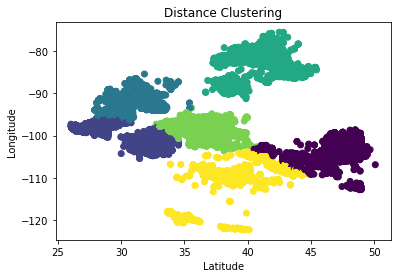

In [16]:
df_cleaned_clustering=df_cleaned.copy()

#Selecting Latitude and Longitude for clustering
X_distance = df_cleaned_clustering[['LATITUDE', 'LONGITUDE']].dropna()

# K-Means clustering
kmeans_distance = KMeans(n_clusters=6)
kmeans_distance.fit(X_distance)

# Adding cluster labels to your dataframe
df_cleaned_clustering.loc[X_distance.index, 'Distance_Cluster'] = kmeans_distance.labels_

# Plotting the clusters
plt.scatter(df_cleaned_clustering['LATITUDE'],df_cleaned_clustering['LONGITUDE'], c=df_cleaned_clustering['Distance_Cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Distance Clustering')

# Save the plot
plt.savefig('../../images/clustering/distance_clustering_plot.png')
plt.show()

# Drop rows where 'LATITUDE' or 'LONGITUDE' is NaN
df_cleaned_clustering = df_cleaned_clustering.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned_clustering, geometry=gpd.points_from_xy(df_cleaned_clustering['LONGITUDE'], df_cleaned_clustering['LATITUDE']))

# Create a base map
map = folium.Map(location=[gdf['LATITUDE'].mean(), gdf['LONGITUDE'].mean()], zoom_start=5)

# Instantiate a marker cluster
marker_cluster = MarkerCluster().add_to(map)

# Add points to the map
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']],
                  popup=f"Cluster: {row['Distance_Cluster']}",
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(marker_cluster)

# Display the map
map.save('../../images/geomaps/distance_cluster_map.html')

In [18]:
# optimal number of clusters for Li concentration

# Initialize the imputer
imputer = IterativeImputer(RandomForestRegressor(n_estimators=100), max_iter=10, random_state=42)


# Create a flag for known and imputed data
df_cleaned_clustering['Data_Type'] = 'Known'
df_cleaned_clustering.loc[df_cleaned_clustering['Li'].isna(), 'Data_Type'] = 'Imputed'

# Apply the imputation within each basin
for basin in df_cleaned_clustering['BASIN_CATEGORY'].unique():
    basin_mask = df_cleaned_clustering['BASIN_CATEGORY'] == basin
    df_cleaned_clustering.loc[basin_mask, 'Li'] = imputer.fit_transform(df_cleaned_clustering.loc[basin_mask, ['Li']])


# Fill NaNs in the 'Li' column with the imputed values
df_cleaned_clustering['Li'].fillna(df_cleaned_clustering.groupby('BASIN_CATEGORY')['Li'].transform(lambda x: x.fillna(x.mean())), inplace=True)

# Calculate SSE for a range of cluster numbers to find the optimal one
sse = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned_clustering[['Li']])
    sse.append(kmeans.inertia_) 

# Plot SSE for each *k* to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()



AttributeError: 'NoneType' object has no attribute 'split'

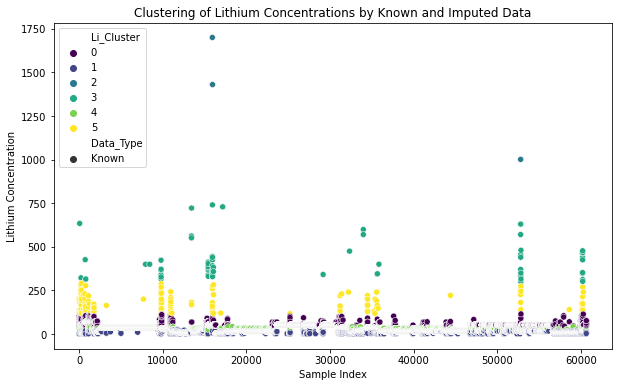

:NdOverlay   [Li_Cluster]
   :Scatter   [index]   (Li,Data_Type)

In [19]:
# Assuming '6' is the optimal number of clusters determined from the Elbow Method
kmeans_Li = KMeans(n_clusters=6, random_state=42)

df_cleaned_clustering['Li_Cluster'] = kmeans_Li.fit_predict(df_cleaned_clustering[['Li']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned_clustering, x=df_cleaned_clustering.index, y='Li', hue='Li_Cluster', style='Data_Type', palette='viridis', markers={'Known': 'o', 'Imputed': 'X'})
plt.xlabel('Sample Index')
plt.ylabel('Lithium Concentration')
plt.title('Clustering of Lithium Concentrations by Known and Imputed Data')
plt.legend()

plt.savefig('../../images/clustering/Li_clustering_plot1.png') 
plt.show()

# Convert cluster numbers to string for better legend handling
df_cleaned_clustering['Li_Cluster'] = df_cleaned_clustering['Li_Cluster'].astype(str)

# Define marker styles for known and imputed data
marker_styles = {'Known': 'o', 'Imputed': 'x'}

scatter = df_cleaned_clustering.hvplot.scatter(
    x='index',
    y='Li',
    by='Li_Cluster',
    hover_cols=['Li', 'Data_Type'],
    cmap='viridis',
    title='Clustering of Lithium Concentrations by Known and Imputed Data'
)
hvplot.save(scatter, '../../images/clustering/Li_clustering_plot2.html')
# Show the plot
scatter


In [20]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned_clustering, geometry=gpd.points_from_xy(df_cleaned_clustering['LONGITUDE'],df_cleaned_clustering['LATITUDE']))

# Create a Folium map
m = folium.Map(location=[gdf['LATITUDE'].mean(), gdf['LONGITUDE'].mean()], zoom_start=5)

# Define a function to calculate radius based on concentration
def calculate_radius(concentration):
    # Scale the concentration to a reasonable range for radius
    scaled_concentration = (concentration - df_cleaned_clustering['Li'].min()) / (df_cleaned_clustering['Li'].max() - df_cleaned_clustering['Li'].min())
    # Define minimum and maximum radius values
    min_radius = 5
    max_radius = 20
    # Scale the concentration to radius range
    radius = min_radius + (max_radius - min_radius) * scaled_concentration
    return radius

# Add points to the map with different markers for known and imputed data
for idx, row in gdf.iterrows():
    radius = calculate_radius(row['Li'])
    if row['Data_Type'] == 'Known':
        folium.CircleMarker(
            location=(row['LATITUDE'], row['LONGITUDE']),
            radius=radius,
            color='blue',
            fill=True,
            fill_color='blue',
            popup=f'Basin: {row["BASIN_CATEGORY"]}\nLi Concentration: {row["Li"]}',
            ).add_to(m)
    else:
        folium.CircleMarker(
            location=(row['LATITUDE'], row['LONGITUDE']),
            radius=radius,
            color='red',
            fill=True,
            fill_color='red',
            popup=f'Basin: {row["BASIN_CATEGORY"]}\nLi Concentration: {row["Li"]}',
            ).add_to(m)

# Display map
m.save('../../images/geomaps/Li_geo_distribution.html')

### Test Hypothesis

In [21]:
#Test Hypothesis: Li Concentration vs TDS
# Check for NaN values and remove them


data = df_cleaned[['Li', 'TDS']].dropna()

# Perform Spearman's rank correlation test
spearman_corr, spearman_pval = st.spearmanr(data['Li'], data['TDS'])

print("Spearman's rank correlation test between Li concentration and TDS:")
print("Correlation Coefficient:", spearman_corr)
print("P-value:", spearman_pval)

# Interpret the results
if spearman_pval < 0.05:
    print("There is a statistically significant relationship between Li concentration and TDS.")
else:
    print("There is no statistically significant relationship between Li concentration and TDS.")


Spearman's rank correlation test between Li concentration and TDS:
Correlation Coefficient: 0.6137236109491551
P-value: 0.0
There is a statistically significant relationship between Li concentration and TDS.


In [22]:
#Test Hypothesis: Li Concentration vs Depth

    
# Check for NaN values and remove them
data = df_cleaned[['Li', 'DEPTHUPPER']].dropna()

# Perform Spearman's rank correlation test
spearman_corr, spearman_pval = st.spearmanr(data['Li'], data['DEPTHUPPER'])

print("Spearman's rank correlation test between Li concentration and Depth:")
print("Correlation Coefficient:", spearman_corr)
print("P-value:", spearman_pval)

# Interpret the results
if spearman_pval < 0.05:
    print("There is a statistically significant relationship between Li concentration and Depth.")
else:
    print("There is no statistically significant relationship between Li concentration and Depth.")

Spearman's rank correlation test between Li concentration and Depth:
Correlation Coefficient: 0.13344852907221139
P-value: 1.4781896954629833e-14
There is a statistically significant relationship between Li concentration and Depth.


### REGRESSION ANALYSIS

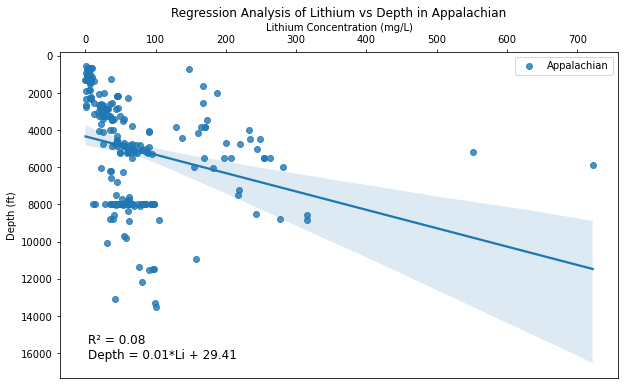

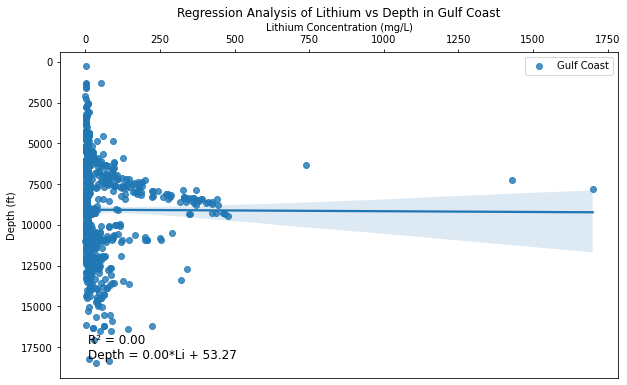

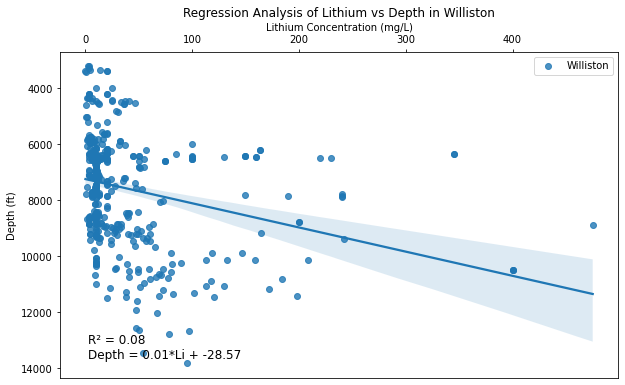

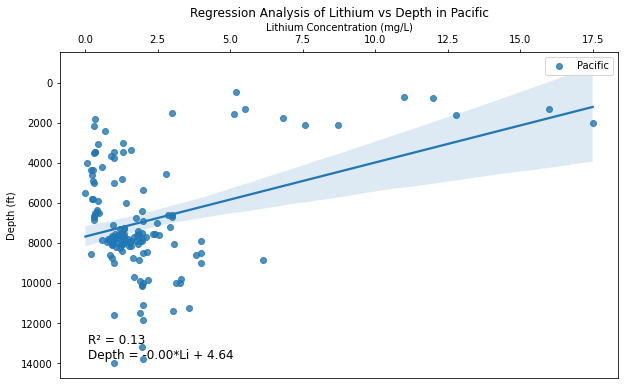

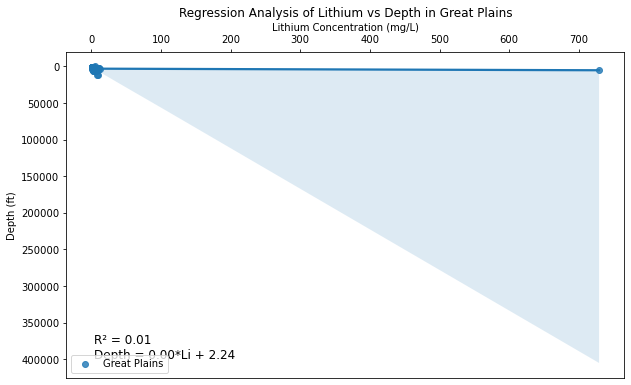

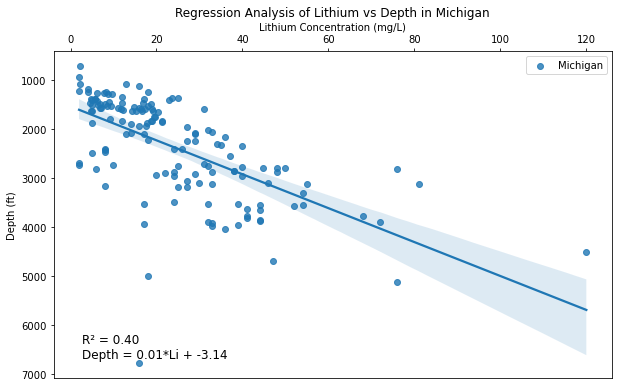

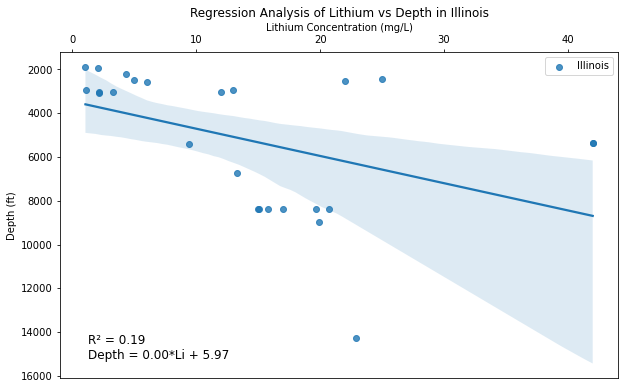

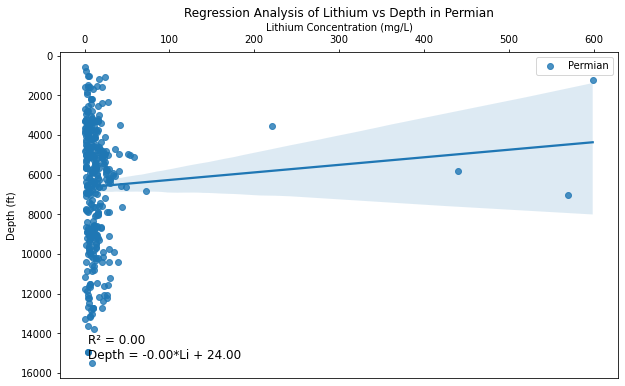

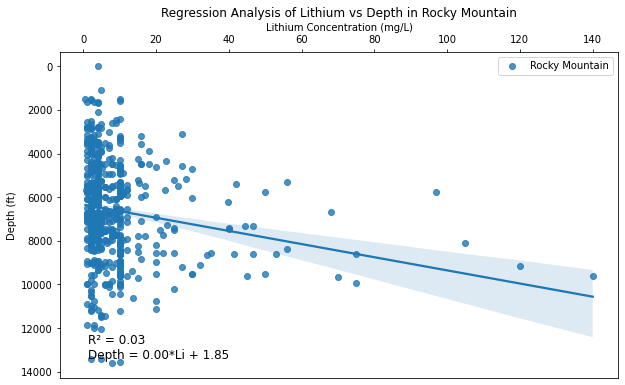

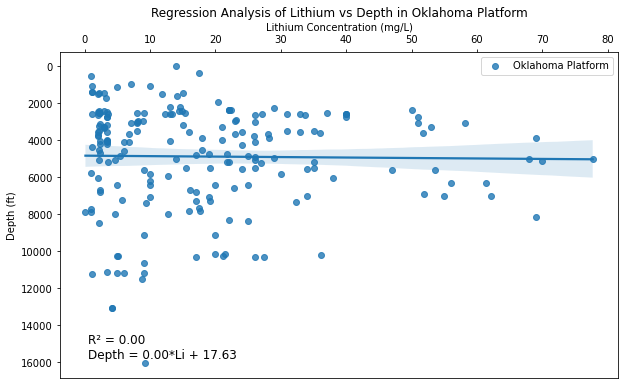

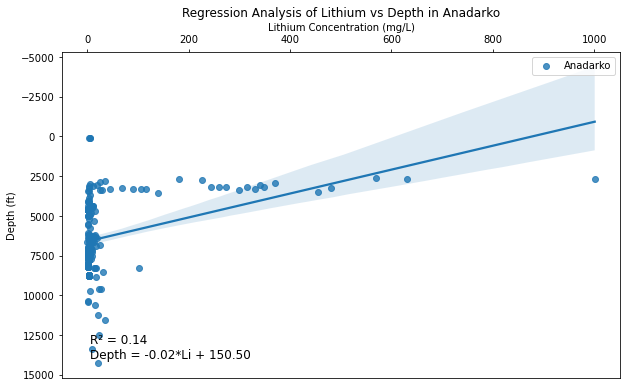

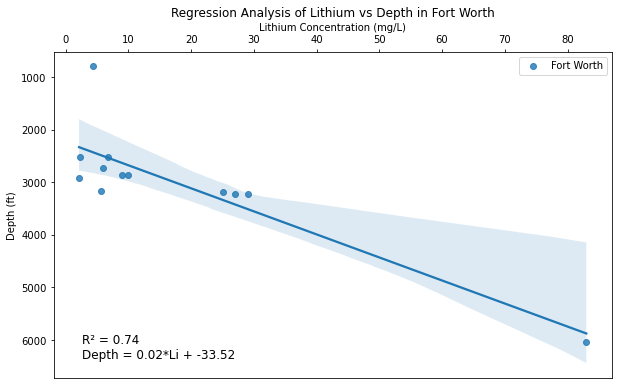

In [23]:
# Selecting only relevant columns
df_analysis = df_cleaned[['Li', 'DEPTHUPPER', 'BASIN_CATEGORY']].dropna()

# Initialize a dictionary to hold regression results
regression_results = {}

# Iterate over each basin category
for basin in df_analysis['BASIN_CATEGORY'].unique():
    # Filter the DataFrame for the current basin
    df_basin = df_analysis[df_analysis['BASIN_CATEGORY'] == basin]

    # Define the predictor (DEPTHUPPER) and response variable (Li)
    X = df_basin[['DEPTHUPPER']]  # Predictor
    y = df_basin['Li']            # Response

    # Create a linear regression model and fit it to the data
    model = LinearRegression()
    model.fit(X, y)

    # Calculate R-squared value
    r_squared = model.score(X, y)
    
    # Store the model and its score in the dictionary
    regression_results[basin] = {
        'model': model,
        'r_squared': model.score(X, y),
        'coefficient': model.coef_,
        'intercept': model.intercept_
    }

    # Plotting the regression for each basin
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Li', y='DEPTHUPPER', data=df_basin, label=f'{basin}')
    plt.xlabel('Lithium Concentration (mg/L)')
    plt.ylabel('Depth (ft)')
    plt.title(f'Regression Analysis of Lithium vs Depth in {basin}')

    # Move x-axis to the top of the plot
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.invert_yaxis()  # Invert y-axis for positive depth downward

    # Annotating the plot with R-squared and regression equation
    plt.text(0.05, 0.05, f'R² = {r_squared:.2f}\nDepth = {model.coef_[0]:.2f}*Li + {model.intercept_:.2f}', 
             transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

    plt.legend()
    plt.savefig(f'../../images/regression_plots/{basin}_regression_plot.png')
    plt.show()


## Imputation and Saving the Imputed DataFrame

In [43]:
# Initialize the IterativeImputer
# Impute missing values and standardize the data
imputer = IterativeImputer(RandomForestRegressor(n_estimators=10), max_iter=10, random_state=42)

# Select columns for imputation
columns = ['B', 'Ba', 'Br', 'HCO3', 'FeTot', 'K', 'Na', 'Cl', 'SO4', 'Mg', 'Li', 'Ca', 'Sr', 'Zn', 'TDS','DEPTHUPPER']
df_chemicals = df_cleaned[columns]

# Fit and transform the dataset
df_chemicals_imputed = imputer.fit_transform(df_chemicals)

# Create a DataFrame from the imputed data
df_chemicals_imputed = pd.DataFrame(df_chemicals_imputed, columns=columns)

# Replace the old chemical data in df_cleaned with the new imputed data
df_cleaned_imputed = df_cleaned.copy()
df_cleaned_imputed[columns] = df_chemicals_imputed

df_cleaned_imputed_toML=df_cleaned_imputed.copy()
df_cleaned_imputed_toML['Li']=df_cleaned['Li']

# Save the imputed DataFrame
df_cleaned_imputed_toML.to_csv("../../data/df_output/df_cleaned_imputed.csv", index=False)

c:\Users\darvarir\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



## Spearman Correlation Analysis and Heatmap Using Imputed Data

In [32]:
basins = df_cleaned_imputed['BASIN_CATEGORY'].unique()

# Loop through each basin and calculate+plot the correlation matrix
for basin in basins:
    # Filter the DataFrame for the current basin
    df_basin = df_cleaned_imputed[df_cleaned_imputed['BASIN_CATEGORY'] == basin]
    
    # Calculate the correlation matrix using Pearson coefficient for the current basin
    correlation_matrix_pearson = df_basin[chemicals].corr(method='pearson')
    
    # Extract the 'Li' correlations, remove its self-correlation, and sort by absolute value
    li_correlations = correlation_matrix_pearson['Li'].drop('Li').abs().sort_values(ascending=False)
    
    # Plotting the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Correlation Matrix (Pearson) for Chemical Constituents in {basin}')
    

    
    # Print the top N most correlated features with 'Li'
    N = 3  
    print(f"Top {N} features most correlated with Li in the {basin} basin:")
    print(li_correlations.head(N))

    # Save the figure to a file with a solid background
    plt.savefig(f'../../images/heatmaps/correlation_matrix_pearson_{basin}.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
    
    # Clear and close the plot to avoid memory issues
    plt.clf()
    plt.close()


Top 3 features most correlated with Li in the Appalachian basin:
Sr     0.589739
B      0.441826
TDS    0.401518
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Permian basin:
Sr    0.714664
Ba    0.515461
Br    0.447248
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Oklahoma Platform basin:
Sr    0.660945
Ba    0.451663
Br    0.270469
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Gulf Coast basin:
Br    0.732089
Sr    0.594596
Ca    0.534201
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Williston basin:
Sr    0.714600
Br    0.520038
B     0.494046
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Michigan basin:
Br    0.599379
Ca    0.445910
B     0.426096
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Pacific basin:
Ba     0.767843
Sr     0.691998
SO4    0.269923
Name: Li, dtype: float64
Top 3 features most correlated with Li in the Illinois ba

##  Use the Imputed DataFrame for PCA- ovaerall data

In [37]:
# Create a directory for saving PCA results if it doesn't exist
output_dir = "../../data/pca_data/overall_pca"
plot_dir = "../../images/pca/overall_pca_plots"
os.makedirs(output_dir, exist_ok=True)

# Load the imputed data
df_cleaned_imputed = pd.read_csv("../../data/df_output/df_cleaned_imputed.csv")

# Define columns to exclude from the PCA
exclude_columns = ['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH','CHARGEBAL', 'BASIN_CATEGORY','Li']

numerical_columns = [col for col in df_cleaned_imputed.columns if col not in exclude_columns]

# Standardize the data
scaler = StandardScaler()
df_numeric = df_cleaned_imputed[numerical_columns]
scaled_data = scaler.fit_transform(df_numeric)

# Perform PCA on the scaled data
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Prepare PCA DataFrame
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)
pca_df['Li'] = df_cleaned['Li']

# Save PCA results with target variable
pca_filename = f"{output_dir}/overall_pca_with_target.csv"
pca_df.to_csv(pca_filename, index=False)
print(f"Saved PCA results with target for the entire dataset to {pca_filename}")

# Save Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for the Entire Dataset')
plot_path = os.path.join(plot_dir, f"overall_PCA_Scree_Plot.png")
plt.savefig(plot_path)
plt.close()

# Save Cumulative Explained Variance Plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for the Entire Dataset')
plot_path = os.path.join(plot_dir, f"overall_Cumulative_Explained_Variance_Plot.png")
plt.savefig(plot_path)
plt.close()

# Save PCA Scatter Plot of the First Two Components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot of First Two Components for the Entire Dataset')
plt.savefig(os.path.join(plot_dir, "overall_PCA_Scatter_Plot.png"))
plt.close()

# Save Loadings Plot
loadings = pca.components_.T
num_features = loadings.shape[0]
plt.figure(figsize=(12, 6))
bar_positions = np.arange(num_features)
plt.bar(bar_positions, loadings[:,0], label='PC1')
plt.bar(bar_positions, loadings[:,1], bottom=loadings[:,0], label='PC2')
plt.xticks(bar_positions, numerical_columns[:num_features], rotation=90)
plt.xlabel('Original Variables')
plt.ylabel('Loadings')
plt.title('Loadings Plot for the Entire Dataset')
plt.legend()
plt.savefig(os.path.join(plot_dir, "overall_PCA_Loadings_Plot.png"))
plt.close()

# Save Biplot
plt.figure(figsize=(10, 8))
for i in range(loadings.shape[0]):
    plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], color='red', alpha=0.9)
    plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, numerical_columns[i], fontsize=9)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Biplot for the Entire Dataset')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.savefig(os.path.join(plot_dir, "overall_PCA_Biplot.png"))
plt.close()


Saved PCA results with target for the entire dataset to ../../data/pca_data/overall_pca/overall_pca_with_target.csv


##  Use the Imputed DataFrame for PCA- By Basin

In [40]:
# Create directories for saving PCA results and plots
output_dir = "../../data/pca_data/byBasin_pca"
plot_dir = "../../images/pca/pca_plots_byBasin"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# Load the imputed data
df_cleaned_imputed = pd.read_csv("../../data/df_output/df_cleaned_imputed.csv")
df_original = pd.read_csv("../../data/df_output/df_cleaned.csv")  # Assuming this contains the original data

# Define columns to exclude from the PCA, including 'Li' and categorical or irrelevant columns
exclude_columns = ['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH','CHARGEBAL', 'BASIN_CATEGORY','Li']

# Loop through each basin
basins = df_cleaned_imputed['BASIN_CATEGORY'].unique()
for basin in basins:
    print(f"Processing PCA for {basin}")
    df_basin = df_cleaned_imputed[df_cleaned_imputed['BASIN_CATEGORY'] == basin]
    df_basin_original = df_original[df_original['BASIN_CATEGORY'] == basin]  # Get original Li values

    # Select numerical columns not in exclude_columns
    numerical_columns = [col for col in df_basin.columns if col not in exclude_columns and df_basin[col].dtype in [np.float64, np.int64]]
    df_numeric = df_basin[numerical_columns]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df_numeric)

    # Perform PCA on the scaled data
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)

    # Prepare PCA DataFrame
    pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    pca_df = pd.DataFrame(pca_result, columns=pca_columns)
    pca_df['Li'] = df_basin_original['Li'].values  # Use original Li values

    # Save PCA results with target variable
    pca_filename = f"{output_dir}/{basin}_pca_with_target.csv"
    pca_df.to_csv(pca_filename, index=False)
    print(f"Saved PCA results with target for {basin} to {pca_filename}")

     # Save Scree Plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Scree Plot for {basin}')
    plt.savefig(f"{plot_dir}/{basin}_PCA_Scree_Plot.png")
    plt.close()

    # Save Cumulative Explained Variance Plot
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Cumulative Explained Variance for {basin}')
    plt.savefig(f"{plot_dir}/{basin}_Cumulative_Explained_Variance_Plot.png")
    plt.close()

    # Ensure biplot and loadings plots if needed:
    # These plots will still visualize only the first two components for clarity and practicality.
    if pca.n_components_ >= 2:
        # PCA Scatter Plot of the First Two Components
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'PCA Scatter Plot of First Two Components for {basin}')
        plt.savefig(f"{plot_dir}/{basin}_PCA_Scatter_Plot_First_Two_Components.png")
        plt.close()

        # Loadings Plot
        loadings = pca.components_[:2].T
        num_features = loadings.shape[0]
        plt.figure(figsize=(12, 6))
        bar_positions = np.arange(num_features)
        plt.bar(bar_positions, loadings[:, 0], label='PC1')
        plt.bar(bar_positions, loadings[:, 1], bottom=loadings[:, 0], label='PC2')
        plt.xticks(bar_positions, numerical_columns, rotation=90)
        plt.xlabel('Original Variables')
        plt.ylabel('Loadings')
        plt.title(f'Loadings Plot for {basin}')
        plt.legend()
        plt.savefig(f"{plot_dir}/{basin}_PCA_Loadings_Plot.png")
        plt.close()

        # Biplot
        plt.figure(figsize=(10, 8))
        for i in range(num_features):
            plt.plot([0, loadings[i, 0]], [0, loadings[i, 1]], color='red', alpha=0.9)
            plt.text(loadings[i, 0] * 1.2, loadings[i, 1] * 1.2, numerical_columns[i], fontsize=9)
        plt.xlabel('First Component')
        plt.ylabel('Second Component')
        plt.title(f'Biplot for {basin}')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.grid()
        plt.savefig(f"{plot_dir}/{basin}_PCA_Biplot.png")
        plt.close()

Processing PCA for Appalachian
Saved PCA results with target for Appalachian to ../../data/pca_data/byBasin_pca/Appalachian_pca_with_target.csv
Processing PCA for Permian
Saved PCA results with target for Permian to ../../data/pca_data/byBasin_pca/Permian_pca_with_target.csv
Processing PCA for Oklahoma Platform
Saved PCA results with target for Oklahoma Platform to ../../data/pca_data/byBasin_pca/Oklahoma Platform_pca_with_target.csv
Processing PCA for Gulf Coast
Saved PCA results with target for Gulf Coast to ../../data/pca_data/byBasin_pca/Gulf Coast_pca_with_target.csv
Processing PCA for Williston
Saved PCA results with target for Williston to ../../data/pca_data/byBasin_pca/Williston_pca_with_target.csv
Processing PCA for Michigan
Saved PCA results with target for Michigan to ../../data/pca_data/byBasin_pca/Michigan_pca_with_target.csv
Processing PCA for Pacific
Saved PCA results with target for Pacific to ../../data/pca_data/byBasin_pca/Pacific_pca_with_target.csv
Processing PCA f